# Prediction using Unsupervised ML
<img src="iris.jpg">

### Importing Important Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

### Importing Dataset

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Preprocessing Data

In [5]:
data = df.drop(['Species'], axis=1)
y = df['Species']

### Visualizing Data

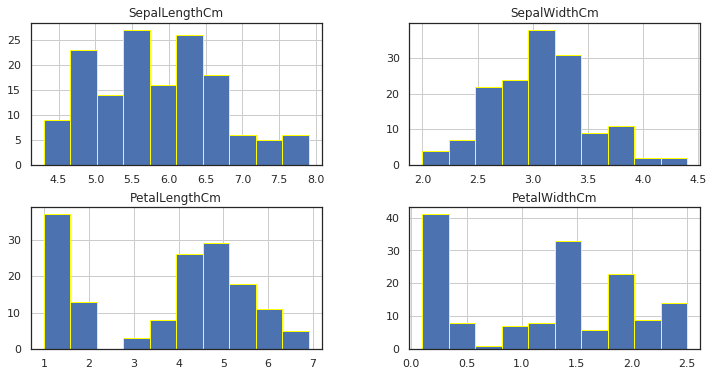

In [7]:
vis = df.drop('Id', axis=1)
vis.hist(edgecolor='yellow', linewidth=1)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

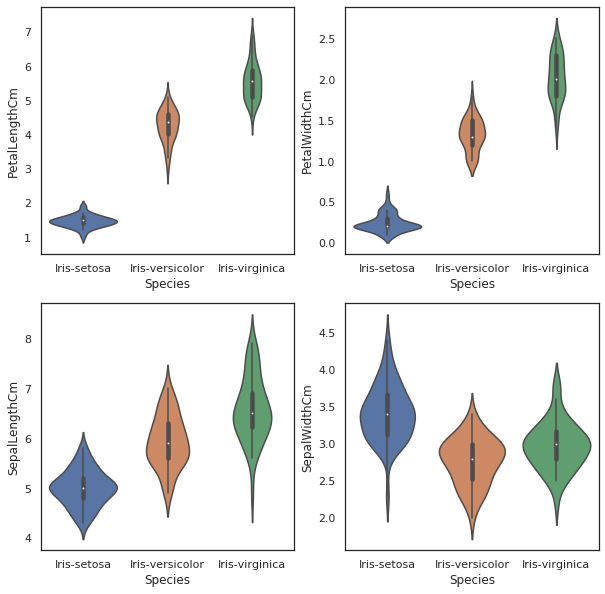

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

### Defining Class for Each Species

In [10]:
def y_label (invalue):
    if invalue == 'Iris-setosa' :
        return 1
    elif invalue == 'Iris-virginica' :
        return 0
    else :
        return 2
df1 = pd.DataFrame(data=y.values, columns=['species'])

df1['index']=df1['species'].apply(y_label)

### Scaling Dataset using Standard Scalar

In [12]:
std_scale = StandardScaler().fit(data)
data_scaled = std_scale.transform(data)
X_scaled = pd.DataFrame(data_scaled, columns = data.columns)

### Elbow Method for finding Optimum Cluster size

Text(0.5, 1.0, 'Elbow Method Plot')

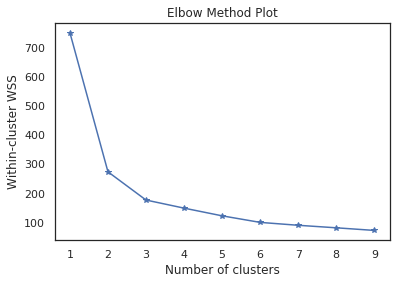

In [16]:
k=10
wss = []
for k in range(1,10):
        kmeans_model = KMeans(n_clusters=k, random_state=123)
        kmeans_model.fit(data_scaled)
        wss.append(kmeans_model.inertia_)
plt.plot(range(1,10), wss, marker='*')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster WSS")
plt.title("Elbow Method Plot")

#### From the above plot optimum value of k should be choosen as such where wss starts increasing rapidly. So, k=3 should be optimum value of k.

### K-mean clustering

Text(0.5, 0.92, 'K Means')

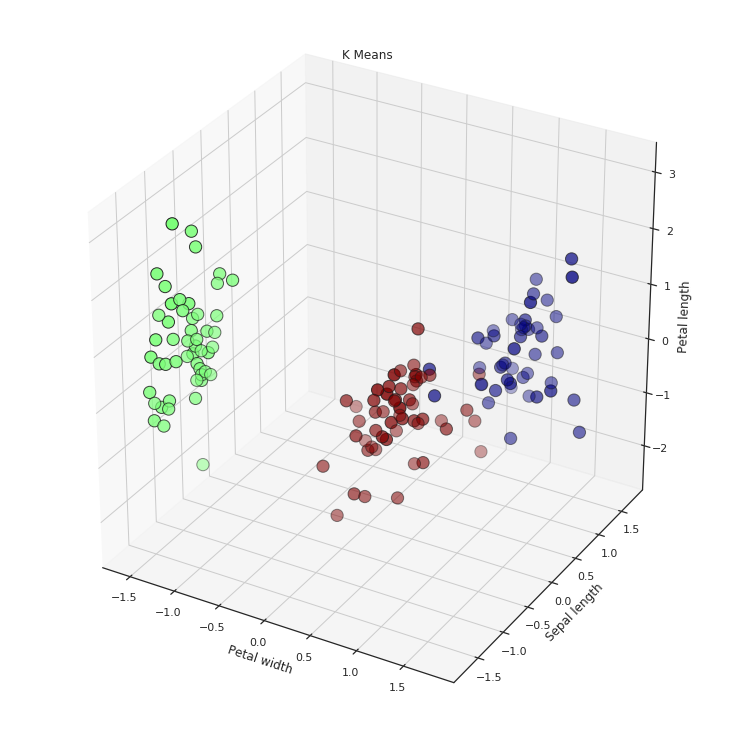

In [21]:
km = KMeans(n_clusters=3, random_state=123)
km.fit(data_scaled)
predicted_cluster = km.predict(data_scaled)
predicted_labels = km.labels_
fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 1, 1])
ax.scatter(data_scaled[:, 3], data_scaled[:, 0], data_scaled[:, 2],
          c=predicted_labels.astype(np.float), cmap='jet',edgecolor="k", s=150)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means")

### Model Prediction

In [22]:
def predict_species (invalue):
    if invalue == 1:
        return 'Iris-setosa' 
    elif invalue == 0 :
        return 'Iris-virginica'
    else :
        return 'Iris-versicolor'
df1['predict_label']= pd.DataFrame(data=predicted_labels, columns=['predict_label'])
df1['predict_species']=df1['predict_label'].apply(predict_species)

In [29]:
print('Incorrect prediction')
df1[df1['species']!=df1['predict_species']]

Incorrect prediction


,species,index,predict_label,predict_species
77,Iris-versicolor,2,0,Iris-virginica
86,Iris-versicolor,2,0,Iris-virginica
101,Iris-virginica,0,2,Iris-versicolor
106,Iris-virginica,0,2,Iris-versicolor
113,Iris-virginica,0,2,Iris-versicolor
119,Iris-virginica,0,2,Iris-versicolor
121,Iris-virginica,0,2,Iris-versicolor


In [30]:
print('Total no of Species:',len(df1))
print('No. of Species correctly predicted:', sum(np.where((df1['species']==df1['predict_species']),1,0)))
print('Accuracy of Model:', sum(np.where((df1['species']==df1['predict_species']),1,0))/len(df1))

Total no of Species: 150
No. of Species correctly predicted: 143
Accuracy of Model: 0.9533333333333334


#### Hence, by k-mean clestering by using k=3 we are able to achieve accuracy as 95.33%. Also, from the incorrect predictions we can conclude that there is some similarity between Iris-vesicolor & Iris-Verginica due to which the model is unable to classify them accurately.